# Linear Regression From Scratch On Boston Dataset

## Loading Data

In [1]:
from sklearn.datasets import load_boston
data=load_boston()

In [2]:
print("shape of the data:",data.data.shape)
print("="*50)
print(data.target.shape)

shape of the data: (506, 13)
(506,)


In [3]:
print("features:",data.feature_names)

features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split
x_strain,x_stest,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33,random_state=42)

## Standardization of Data

In [5]:
from sklearn.preprocessing import StandardScaler
sgd=StandardScaler()
x_train=sgd.fit_transform(x_strain)
x_test=sgd.transform(x_stest)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


## Applying Linear Regression

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error
optimal_w=[]
optimal_b=[]
optimal_w.append(np.random.rand(13,1))
optimal_b.append(np.random.rand(1,1))
error_iteration=[]
r=0.0001

def function(x,y,weight,intercept):
    we=[]
    be=[]
    we.append(weight)
    be.append(intercept)
    for i in range(len(x)):#updating weight on each data point (SGD with batch size 1).
        x_i=x[i].reshape(13,1)
        opt_w=we[i]-r*((-2*x_i)*(y[i]-np.matmul(we[i].T,x_i)-be[i]))
        opt_b=be[i]-r*((-2)*(y[i]-np.matmul(we[i].T,x_i)-be[i]))
        we.append(opt_w)
        be.append(opt_b)
        
    optimal_w.append(opt_w)#storing the optimal w and b after one epoch in a global variable optimal_w and optimal_b.
    optimal_b.append(opt_b)
    


def predict(x_test,w,b):
    y=[]
    for i in range(len(x_test)):
        y.append(np.matmul(w.T,x_test[i])+b[0])
    return y


def optimal_w_b(epoch):
    for i in range(epoch): 
        
        function(x_train,y_train,optimal_w[i],optimal_b[i])
        
        y_pred=predict(x_test, optimal_w[i+1], optimal_b[i+1])
        error=mean_squared_error(y_test,y_pred)#calcualting loss after each epochs.
        error_iteration.append(error)
        
        print("iteration:{}, error:{}".format(i+1,error))

In [8]:
epoch=83 #After 83 iteration we get our optimal w and b
optimal_w_b(epoch)

iteration:1, error:449.29468414101035
iteration:2, error:386.7339233277925
iteration:3, error:337.8686826722339
iteration:4, error:297.53747055223204
iteration:5, error:263.2128294776483
iteration:6, error:233.53640634228148
iteration:7, error:207.68161430977074
iteration:8, error:185.07620280288003
iteration:9, error:165.28080980667986
iteration:10, error:147.93485128031415
iteration:11, error:132.7313772583288
iteration:12, error:119.4043808229882
iteration:13, error:107.72150586014665
iteration:14, error:97.47916792719022
iteration:15, error:88.49883666978529
iteration:16, error:80.62395807484565
iteration:17, error:73.71729665382414
iteration:18, error:67.65859949496439
iteration:19, error:62.342531839826464
iteration:20, error:57.67685196436134
iteration:21, error:53.580800030975006
iteration:22, error:49.983678541316976
iteration:23, error:46.82360381750199
iteration:24, error:44.046409507330736
iteration:25, error:41.60468469330528
iteration:26, error:39.45693079864654
iteration

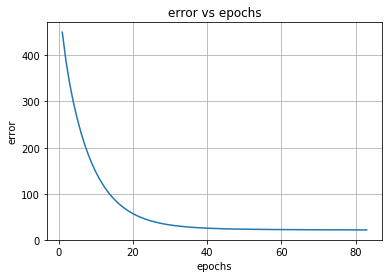

In [10]:
import matplotlib.pyplot as plt
epochs=[]
for i in range(1,84):
    epochs.append(i)
    
plt.plot(epochs,error_iteration)
plt.title("error vs epochs")
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()
plt.show()